In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import BolBands
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'spy'
stock = Stock(ticker, config='../config.toml.example')
stock.load_data()
stock.snip_dates('2021-01-01', '2021-12-31')

In [3]:
%%time
# Calculate Bollinger Bands signal
bb_signal = BolBands(stock)

CPU times: user 58.1 ms, sys: 2.66 ms, total: 60.7 ms
Wall time: 60.7 ms


In [4]:
%%time
# Run simulation
sim = Simulation(bb_signal.stock_obj)
sim.paper_trade()

CPU times: user 2.11 s, sys: 81.7 ms, total: 2.2 s
Wall time: 2.33 s


In [5]:
bb_signal.stock_obj.signal[bb_signal.stock_obj.signal < 0]

2021-09-21   -1.0
2021-09-30   -1.0
dtype: float64

In [6]:
sim.calc_pnl()

spy simulation PnL: $101,021


In [7]:
doberplot = DoberPlot(stock)

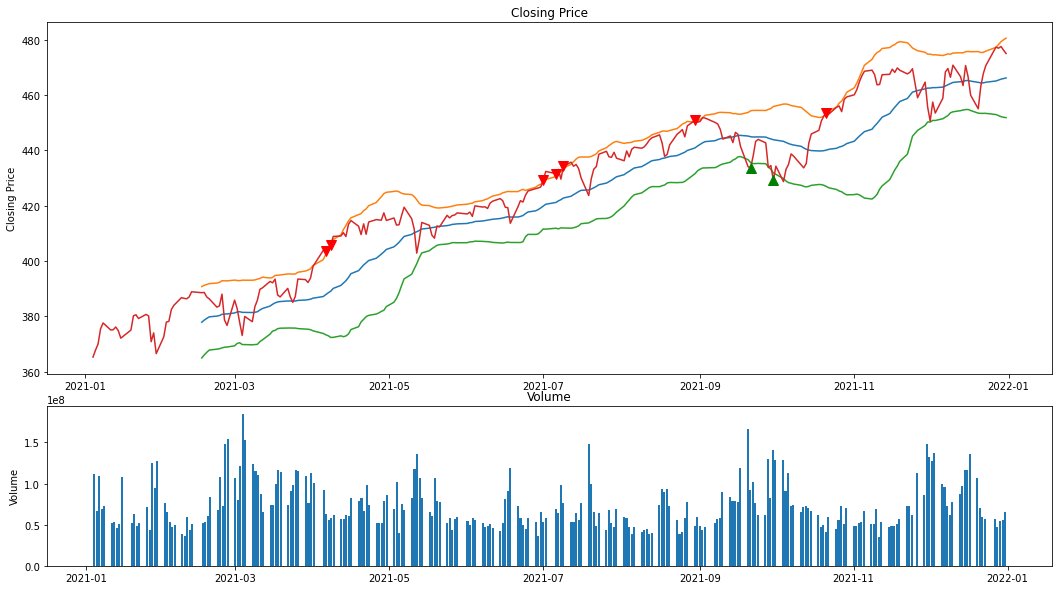

In [8]:
doberplot.order_signal(strategy_name='bolbands')